# Oxidative Phosphorylation Subsystem

Set the model environment

In [1]:
import cobra.test
import pandas as pd
import numpy as np
import pandas as pd
import escher
from escher import Builder
from cobra.sampling import sample
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)
model = cobra.io.load_json_model('./e_coli_core.json') # Model must be in the same directory

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10


# Energy Production & Management

Perhaps the most important requirement of an operational cell is the production and management of energy and reducing power. There are two main mechanisms available within the E.coli core model for the production of ATP (atp_c) energy: 1) substrate level phosphorylation, and 2) oxidative phosphorylation through the use of the electron transport chain. Substrate level phosphorylation occurs when specific metabolic pathways within the cell are net producers of energy. In these cases, atp_c is formed by a reaction between ADP (adp_c) and a phosphorylated intermediate within the pathway. In the core model this occurs in the glycolysis pathway with both phosphoglycerate kinase (PGK), and pyruvate kinase (PYK), and in the tricarboxylic acid cycle with succinyl-CoA synthetase (SUCOAS). Through these substrate level phosphorylation enzymes each molecule of glucose can potentially add four molecules to the total cellular flux of atp_c. 
The second mechanism for energy generation is oxidative phosphorylation through the electron transport chain, which under aerobic conditions, produces the bulk of the cell's atp_c. In the simple core model, the electron transport chain is used to transport protons (h_c) from the cytoplasm across the cytoplasmic membrane into the extracellular space (periplasmic space in actual cells) to create a proton-motive force which drives ATP synthase (ATPS4r) to produce atp_c. 

A map showing the location of the oxidative phosphorylation subsystem is shown below.

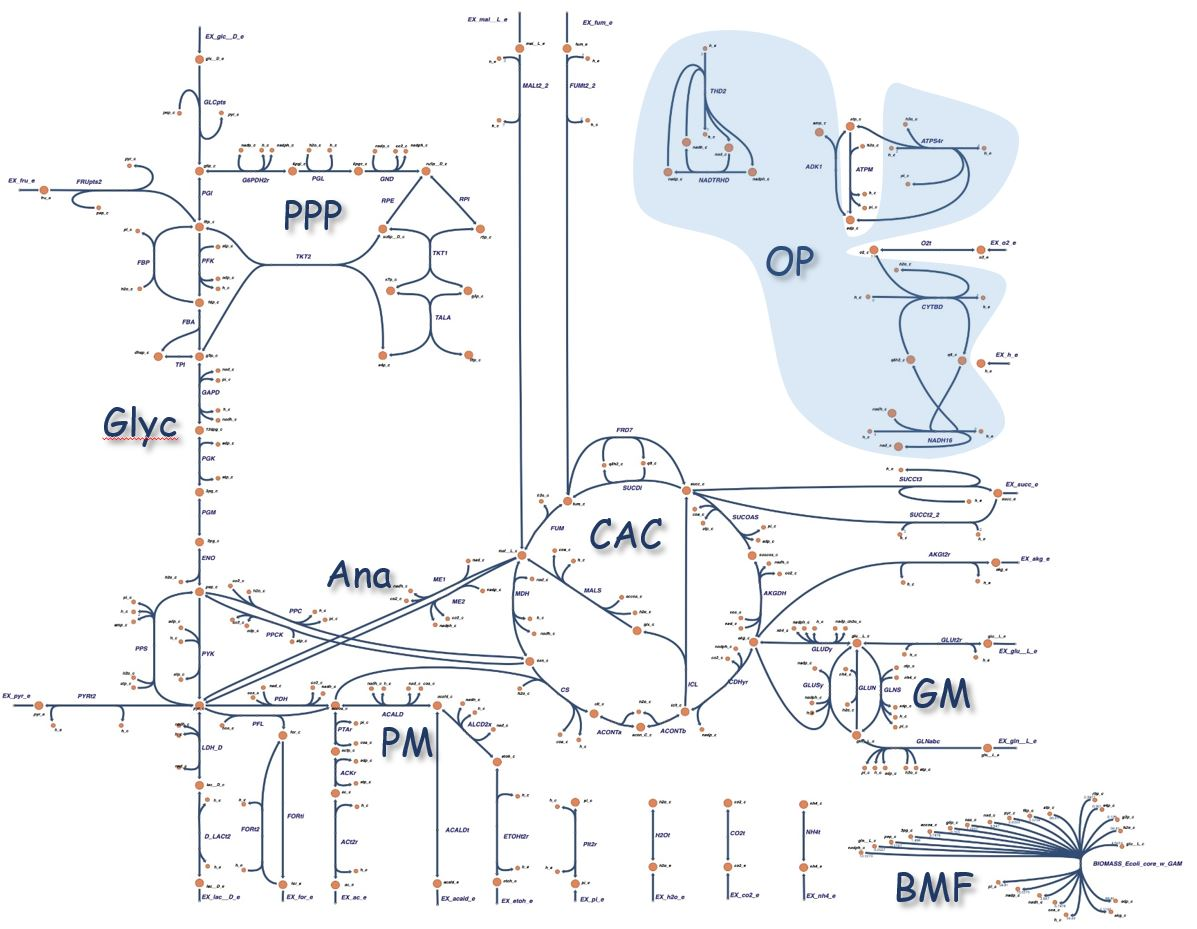

The basic Oxidative Phosphorylation Subsystem is shown below [1]

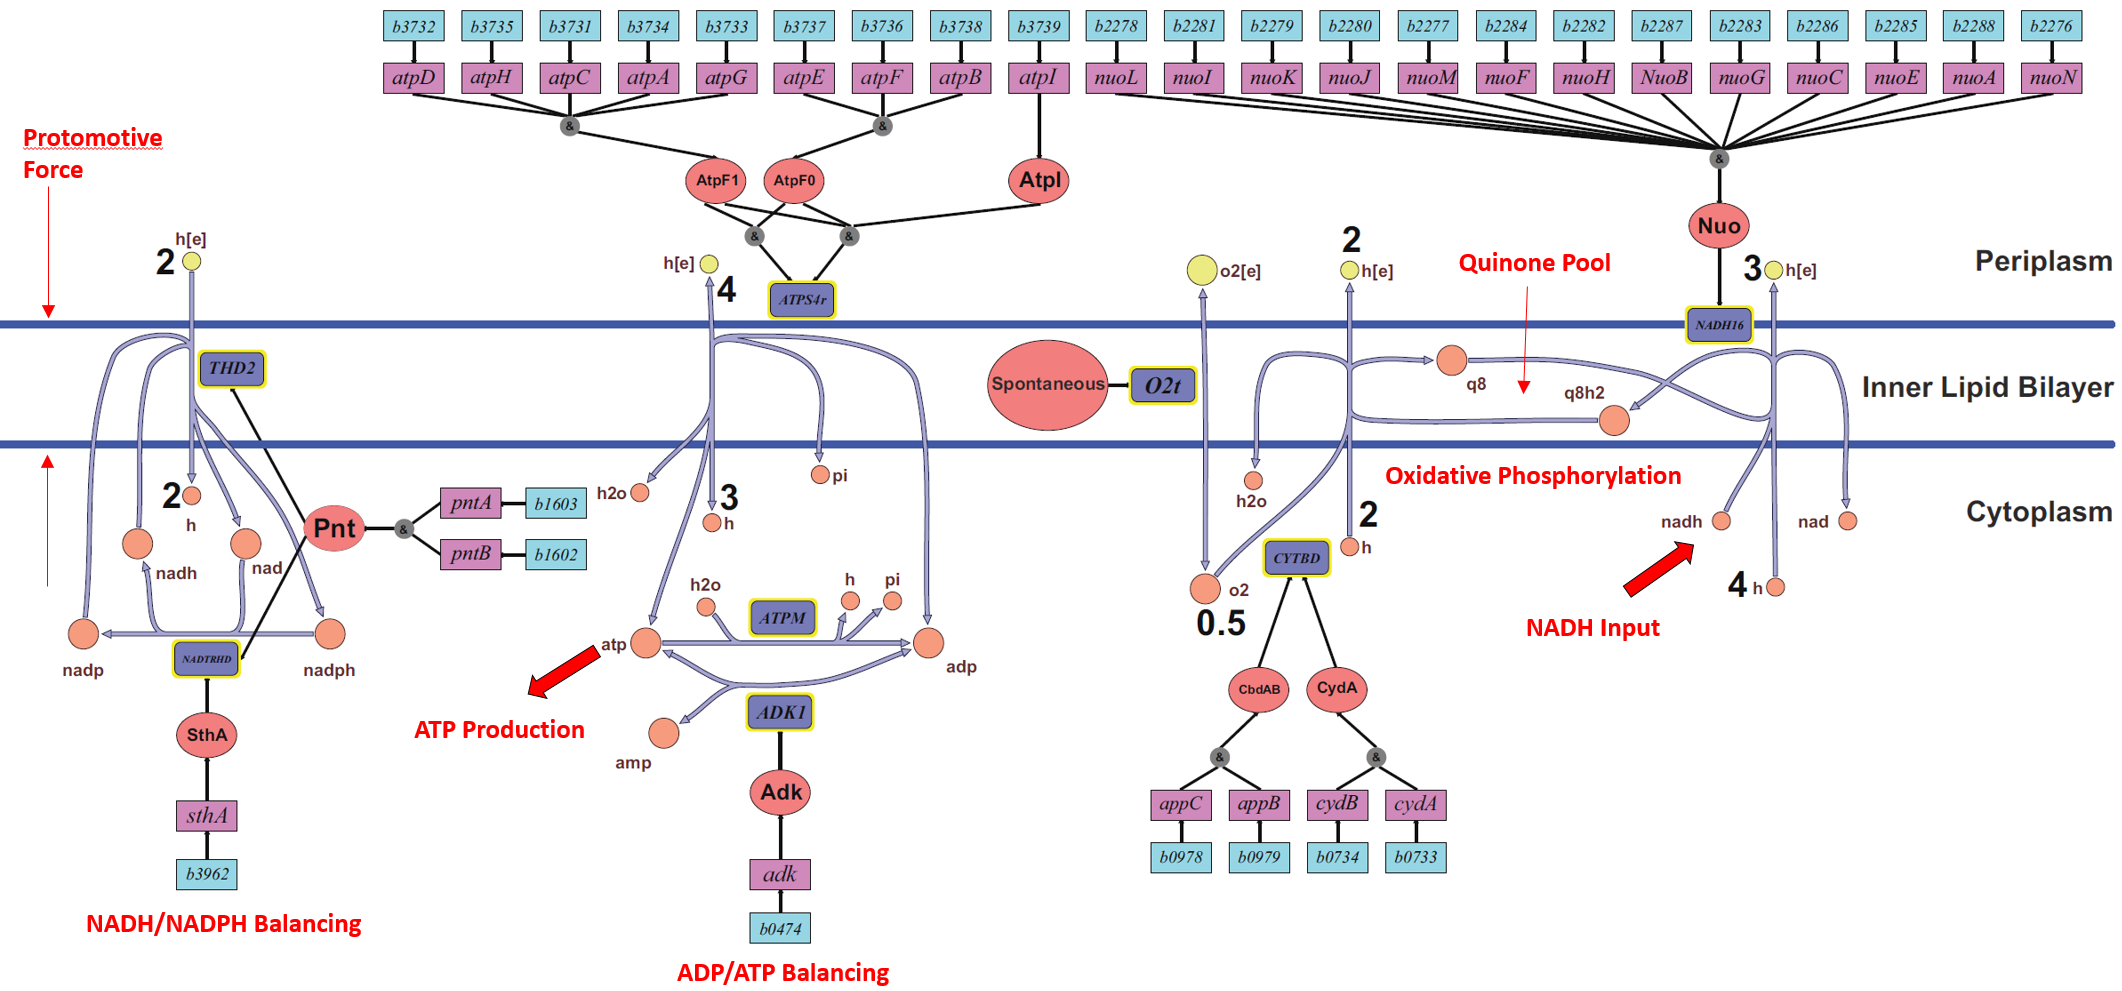

## Aerobic Respiration

For aerobic respiration, the primary source of atp_c is produced through oxidative phosphorylation. This is illustrated in Figure 9 where NADH (nadh_c), acting as a substrate for NADH dehydrogenase (NADH16), provides the reducing power necessary to trigger the electron transport chain. The *E. coli* core model combines the electron transport chain into two reactions. In the first of these two reactions, NADH16 catalyzes the oxidation of nadh_c to form NAD+ (nad_c) while extracting four protons (h_c) from the cytoplasm. It then transports three protons to the extracellular space while combining the fourth proton with a proton and two electrons from NADH to transform ubiquinone-8) (q8_c) to its reduced form ubiquinol-8 (q8h2_c). Both q8_c and q8h2_c are oil soluble coenzymes that can diffuse freely within the lipid environment of the cytoplasmic membrane allows q8h2_c to eventually transfer its two electrons and two protons to cytochrome oxidase (CYTBD). The two protons (h_e) are then transferred into the extracellular space where they add to the proton-motive force. The two electrons from q8h2_c are then combined with two cytoplasmic protons and an oxygen atom, the terminal electron acceptor, to form water. In this model, oxygen (o2_c) spontaneously diffuses from the environment into the cell through the spontaneous 02t reaction. 

With a proton-motive force now created by the pumping of protons from the cytoplasm to the extracellular space, the reaction ATPS4r can synthesize atp_c from adp_c. For this simple model the P/0 ratio is stoichiometrically set to 1.25. Another reaction included in the energy management suite is adenylate kinase (ADK1), a phosphotransferase enzyme that catalyzes the interconversion of adenine nucleotides, and plays an important role in the adp_c/atp_c balance or cellular energy homeostasis.

Finally, the ATP maintenance function (ATPM), which is set at 8.39  accounts for the energy (in form of atp_c) necessary to replicate a cell, including for macromolecular synthesis (e.g., proteins, DNA, and RNA). Thus, for growth to occur in the *E.coli* model, the flux rate through ATPM must be greater than 8.39. If the model detects that ATPM has not reached its minimum value it will not produce FBA results.

Another part of the energy management of a cell is the reducing power that is required for both cellular catabolism and anabolism. Catabolism refers to a set of metabolic pathways that break down molecules into smaller units and release energy. For this core model, nadh_c provides the reducing power necessary for the catabolic activities of the cell. 

Anabolism, on the other hand, is the set of metabolic pathways that construct molecules from smaller units. These anabolic reactions are endergonic and therefore require an input of energy. In this case, NADPH (nadph_c) is the reducing power required for biosynthesis using the cell’s precursor metabolites. 

Maintaining the proper balance between anabolic reduction charge, nadph_c/nadp_c, and catabolic reduction charge, nadh_c/nad_c, is achieved by reactions catalyzed by transhydrogenase enzymes, as shown in Figure 9. Using the proton-motive force, NAD(P) transhydrogenase (THD2) catalyzes the transfer of a hydride ion, a negative ion of hydrogen, from nadh_c to create nadph_c. The opposite transfer, of a hydride ion from nadph_c, to create nadh_c, is catalyzed by another enzyme, NAD+ transhydrogenase (NADTRHD), but it is not coupled to the translocation of protons. These pair of reactions effectively allow transfer of reducing equivalents between anabolic and catabolic reduction charge.

Now let's use the COBRApy Toolbox to explore the details of the energy managing elements of the *E.coli* core model. In this tutorial, we will focus on exploring the role of cofactors in a core model that is optimized for growth-rate. There is a good discussion of how to find the maximum cofactor fluxes possible in a COBRA-based model in Chapter 19 of Palsson's book [1]. To start with let's print out a table that includes all the reaction abbreviations, names, and their formulas for the reactions invovled in oxidative phosphorylation and the cell's energy and reducing power management (see Figure 9).  

In [2]:
# Create a table of all the reactions and their associated subsystems
reaction_names = [r.name for r in model.reactions]
reaction_ids = [r.id for r in model.reactions]
reaction_formula = [r.reaction for r in model.reactions]
reaction_subsystem = [r.subsystem for r in model.reactions]
reactionList = {'Reaction ID': reaction_ids,
                'Reaction Name': reaction_names,
                'Reaction Formula': reaction_formula,
                'Reaction Subsystem': reaction_subsystem,
               }

df = pd.DataFrame(reactionList, columns= ['Reaction ID','Reaction Name','Reaction Formula','Reaction Subsystem'])
# Select the reactions associated with the desired subsystem
SSindex = []
for i in range(len(reaction_subsystem)):
    if reaction_subsystem[i] == 'Oxidative Phosphorylation':
        SSindex.append(i)
df.loc[SSindex]

,Reaction ID,Reaction Name,Reaction Formula,Reaction Subsystem
19,ADK1,Adenylate kinase,amp_c + atp_c <=> 2.0 adp_c,Oxidative Phosphorylation
21,ATPS4r,ATP synthase (four protons for one ATP),adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c,Oxidative Phosphorylation
31,CYTBD,Cytochrome oxidase bd (ubiquinol-8: 2 protons),2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_e + q8_c,Oxidative Phosphorylation
36,SUCDi,Succinate dehydrogenase (irreversible),q8_c + succ_c --> fum_c + q8h2_c,Oxidative Phosphorylation
39,THD2,NAD(P) transhydrogenase,2.0 h_e + nadh_c + nadp_c --> 2.0 h_c + nad_c + nadph_c,Oxidative Phosphorylation
67,FRD7,Fumarate reductase,fum_c + q8h2_c --> q8_c + succ_c,Oxidative Phosphorylation
90,NADH16,NADH dehydrogenase (ubiquinone-8 & 3 protons),4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c,Oxidative Phosphorylation
91,NADTRHD,NAD transhydrogenase,nad_c + nadph_c --> nadh_c + nadp_c,Oxidative Phosphorylation


Although this is a specifc table for the reactions associated with energy management, it illusttrates how you can pull up the full reaction (enzyme) name and formula for any subsystem in the core model. It should be pointed out that although the reactions succinate dehydrogenase (SUCDi) and  fumarate reductase (FRD7) are included in the oxidative phosphorylation subsystem because they are membrane-bound enzymes that interact with the quinone pool, they are a better fit functionally in the TCA cycle, as will be seen later. 

Now lets explore the flux through these reactions in aerobic conditons with the glucose uptake set at -10 and the oxygen uptake at -30.

In [3]:
model = cobra.io.load_json_model('./e_coli_core.json')
# Set the inputs
model.reactions.EX_o2_e.lower_bound = -30
model.reactions.EX_glc__D_e.lower_bound = -10
# Optimize
solution = model.optimize()
solution.fluxes[SSindex]

ADK1        0.000000
ATPS4r     45.514010
CYTBD      43.598985
SUCDi       5.064376
THD2        0.000000
FRD7        0.000000
NADH16     38.534610
NADTRHD     0.000000
Name: fluxes, dtype: float64

Let's start by looking at the ESCHER map of the core model with these conditions

In [4]:
builder = Builder(
    map_name='e_coli_core.Core metabolism', 
    model_name='e_coli_core', 
)
builder

Builder()

In [5]:
builder.reaction_data = solution.fluxes

Note all the flux activity in the reactions associated with oxidative phosphorylation (upper right corner).  In this figure we can see the electrons from nadh_c entering the electron transport NADH16, flowing through the quinone pool, and then finding their way to reduce oxygen through CYTBD and O2t. With the proton-motive force in place, ATPS4r can now use that energy to convert adp_c to atp_c. We can also see the flux flowing through the dummy reaction ATPM that is used to model the atp_c load required for cell growth. Finally, THD2, NADTRHD or ADK1 are not required to recycle any of the key energy cofactors.

Let's examine the electron transport operation using the COBRApy tools.

To start with let's look at how the metabolite nadh_c is both produced and consumed.

In [6]:
model.metabolites.nadh_c.summary()

Percent,Flux,Reaction,Definition
13.14%,5.064,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
8.04%,3.1,BIOMASS_Ecoli_core_w_GAM,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
13.14%,5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
24.09%,9.283,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


Note that in this case, the only consumer of nadh_c is NAD16 which is the beginning of the electron transport chain. The producing reactions, as we will discuss later, are located in the glycolysis (GAPD, PDH) and TCA (AKGDH, MDH) pathways. Note that for this core model, the biomass function is also listed as a producer. Since the biomass function represents all the functionality not included in the core model (e.g. biosynthesis pathways), this implies that nadh_c would be produced in other parts of the cell that are not included in this simple core model. 

The flux through NADH16 is.

In [7]:
solution.fluxes.NADH16

38.53460965051542

The stochiometry of NADH16 can be found by

In [8]:
model.reactions.NADH16

Reaction identifier,NADH16
Name,NADH dehydrogenase (ubiquinone-8 & 3 protons)
Memory address,0x01a87b8421c0
Stoichiometry,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c 4.0 H+ + Nicotinamide adenine dinucleotide - reduced + Ubiquinone-8 --> 3.0 H+ + Nicotinamide adenine dinucleotide + Ubiquinol-8
GPR,b2276 and b2277 and b2278 and b2279 and b2280 and b2281 and b2282 and b2283 and b2284 and b2285...
Lower bound,0.0
Upper bound,1000.0


The stochiometry of NADH16 is *4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c*. This implies that proton flux, h_c, consumed by NADH16 should have four time the flux value of nadh_c and q8_c should consume the same value of flux as nadh_c. On the other hand, NADH16 should produce a proton flux (h_e) into the extracelluar space that is three times the value of the nadh_c flux, a q8h2_c quinone flux at the same value as the input nadh_c flux, and finally recycle nadh_c to nad_c at the same flux rate as the incoming nadh_c flux.

The operation of NADH16 requires a proton flux value ("h_c") four times that of nadh_c and a flux equal to the nadh_c flux for q8_c (ubiquinone-8) which will eventually be transferred to CYTBD (cytochrome oxidase) through the quinone pool. Let's verify this by looking at the NADH16 consumed values for both h_c and q8_c.

In [9]:
model.metabolites.get_by_id('h_c').summary()

Percent,Flux,Reaction,Definition
3.39%,8.39,ATPM,atp_c + h2o_c --> adp_c + h_c + pi_c
55.14%,136.5,ATPS4r,adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
21.11%,52.27,BIOMASS_Ecoli_core_w_GAM,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
2.43%,6.007,CS,accoa_c + h2o_c + oaa_c --> cit_c + coa_c + h_c
2.00%,4.96,G6PDH2r,g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c
6.47%,16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
0.09%,0.2235,GLNS,atp_c + glu__L_c + nh4_c --> adp_c + gln__L_c + h_c + pi_c
2.05%,5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
3.02%,7.477,PFK,atp_c + f6p_c --> adp_c + fdp_c + h_c
2.00%,4.96,PGL,6pgl_c + h2o_c --> 6pgc_c + h_c


The consumed value of h_c by the reaction NADH16 is 154.1 mmol/gDW-hr which is 4 times the flux value of nadh_c (38.5346 mmol/gDW-hr) entering the reaction which is what we expected.

Now looking at the consumed value of q8_c we can see that this mets the expectation of 38.5346 mmol/gDW-hr.

In [10]:
model.metabolites.get_by_id('q8_c').summary()

Percent,Flux,Reaction,Definition
100.00%,43.6,CYTBD,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_e + q8_c
Percent,Flux,Reaction,Definition
88.38%,-38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c
11.62%,-5.064,SUCDi,q8_c + succ_c --> fum_c + q8h2_c


Looking now at the values of the fluxes produced by NADH. These fluxes in the metabolites nad_c, q8h2_c and h_c. Here we expect to see the flux value for nad_c to be equal to the incoming flux of nadh_c since this part of the reaction is just recycling nadh_ to nad_c.

In [11]:
model.metabolites.get_by_id('nad_c').summary()

Percent,Flux,Reaction,Definition
100.00%,38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c
Percent,Flux,Reaction,Definition
13.14%,-5.064,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
8.04%,-3.1,BIOMASS_Ecoli_core_w_GAM,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,-16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
13.14%,-5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
24.09%,-9.283,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c


Now looking at the consumed value of q8h2_c we can see that this meets the expectation of 38.5346 mmol/gDW-hr. 

In [12]:
model.metabolites.get_by_id('q8h2_c').summary()

Percent,Flux,Reaction,Definition
88.38%,38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c
11.62%,5.064,SUCDi,q8_c + succ_c --> fum_c + q8h2_c
Percent,Flux,Reaction,Definition
100.00%,-43.6,CYTBD,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_e + q8_c


Finally, we look at the producing flux of h_e which is used to create the protomotive force to allow the creation of atp_c through the process of oxidative phosphorylation. In this case, we expect a flux of three times the input nadh_c flux of 115.6 mmol/gDW-hr. 

In [13]:
model.metabolites.get_by_id('h_e').summary()

Percent,Flux,Reaction,Definition
43.00%,87.2,CYTBD,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_e + q8_c
57.00%,115.6,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c
Percent,Flux,Reaction,Definition
89.77%,-182.1,ATPS4r,adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
8.64%,-17.53,EX_h_e,h_e <=>
1.59%,-3.215,PIt2r,h_e + pi_e <=> h_c + pi_c


The next step in the eletron transport chain is to look at the flux from the quinone q8h2_c being consumed by CYTBD (cytochrome oxidase). The stochiometry of CYTBD can be seen from the summary of h_e to be  

    2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_e + q8_c
     
 It should be remembered that the primary purpose of this reaction, like NADH16, is to pump protons into the extracellular space to create the protomotive force needed by ATPSr4 to create ATP. This is driven by the ubiquinol-8 (q8h2_c) flux of 43.6 mmol/gDW-hr. This is shown in the q8h2_c metabolite summary above as a consuming reaction. The proton flux produced by CYTBD should be twice the q8h2_c flux rate as shown in the stochiometric equation above. This can be seen in the h_e metabolite summary above as a producing reaction with 87.2 mmol/gDw-hr. This reaction also combines two h_c protons with o2_c to produce water. Finally, the q8h2_c is recycled back to q8_c to allow the quinone cycle to repeat.
 
With the extracellular proton flux created by NADH16 and CYTBD there should now be a protomotive force to allow ATPS4r to allow protons to flow from the extracellular space to the cytoplasm to create atp_c. We can see this through the stochiometry of ATPS4r (see h_e metebolite summary above)

    adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
    
From this we can see that the reaction ATPS4r combines cytoplasmic adp_c and pi_c with four extracellular protons to create atp_c, water, and three cytoplasmic protons at a flux rate of.

In [14]:
solution.fluxes.ATPS4r

45.51400977451744

In the Escher map above we can also see the flux flowing through the dummy reaction ATPM that is used to model the atp_c load required for cell growth. Finally, THD2, NADTRHD or ADK1 are not required to recycle any of the key energy cofactors in this aerobic simulation.

# References

1. Orth, Fleming, and Palsson (2010), EcoSal Chapter 10.2.1 - Reconstruction and Use of Microbial Metabolic Networks: the Core Escherichia coli Metabolic Model as an Educational Guide  